### Steven Lineses

c:\users\steven\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexes\base.py:183: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return cls.__new__(cls, **d)
c:\users\steven\appdata\local\programs\python\python37\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aspect'
  s)


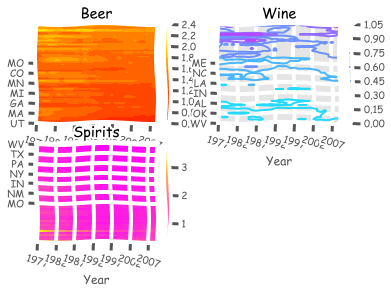

In [151]:
# unit 41
import matplotlib, matplotlib.pyplot as plt
import pickle, pandas as pd

alco = pickle.load(open("alco.pickle", "rb"))

del alco["Total"]
columns, years = alco.unstack().columns.levels

states = pd.read_csv("states.csv",
                    names=("State", "Standard", "Postal", "Capital"))
states.set_index("State", inplace=True)

frames = [pd.merge(alco[column].unstack(), states,
                  left_index=True, right_index=True).sort_values(2009)
         for column in columns]

span = max(years) - min(years) + 1

matplotlib.style.use("ggplot")

STEP = 5
for pos, (draw, style, column, frame) in enumerate(zip((plt.contourf, 
                                                       plt.contour,
                                                       plt.imshow),
                                                      (plt.cm.autumn,
                                                       plt.cm.cool,
                                                       plt.cm.spring),
                                                      columns,
                                                      frames)):
    
    plt.subplot(2, 2, pos + 1)
    
    draw(frame[frame.columns[:span]], cmap=style, aspect="auto")
    
    plt.colorbar()
    plt.title(column)
    plt.xlabel("Year")
    plt.xticks(range(0, span, STEP), frame.columns[:span:STEP])
    plt.yticks(range(0, span, STEP), frame.Postal[::STEP])
    plt.xticks(rotation=-17)

c:\users\steven\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexes\base.py:183: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return cls.__new__(cls, **d)


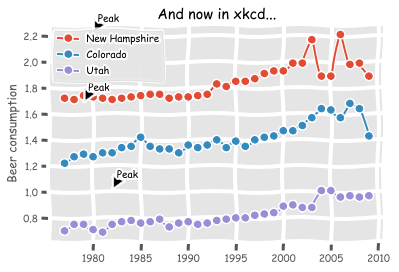

In [152]:
# unit 43
import matplotlib, matplotlib.pyplot as plt
import pickle, pandas as pd

alco = pickle.load(open("alco.pickle", "rb"))

BEVERAGE = "Beer"
years = alco.index.levels[1]
states = ("New Hampshire", "Colorado", "Utah")

plt.xkcd()
matplotlib.style.use("ggplot")

for state in states:
    ydata = alco.loc[state][BEVERAGE]
    plt.plot(years, ydata, "-o")
    
    plt.annotate(s="Peak", xy=(ydata.idxmax(), ydata.max()),
                xytext=(ydata.idxmax() + 0.5, ydata.max() + 0.1),
                arrowprops={"facecolor": "black", "shrink": 0.2})
    
    plt.ylabel(BEVERAGE + " consumption")
    plt.title("And now in xkcd...")
    plt.legend(states)

c:\users\steven\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexes\base.py:183: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return cls.__new__(cls, **d)


Text(0.5, 1.0, 'New Hampshire: From Beet to Wine in 32 Years')

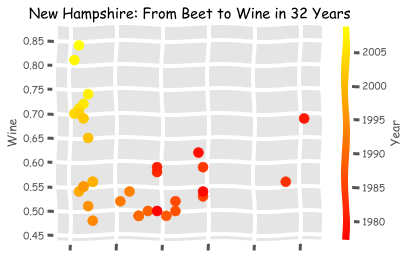

In [153]:
# unit 44
import matplotlib, matplotlib.pyplot as plt
import pickle, pandas as pd

alco = pickle.load(open("alco.pickle", "rb"))

matplotlib.style.use("ggplot")

STATE = "New Hampshire"
statedata = alco.loc[STATE].reset_index()
statedata.plot.scatter("Beer", "Wine", c="Year", s=100, cmap=plt.cm.autumn)

plt.title("%s: From Beet to Wine in 32 Years" % STATE)

c:\users\steven\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexes\base.py:183: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return cls.__new__(cls, **d)


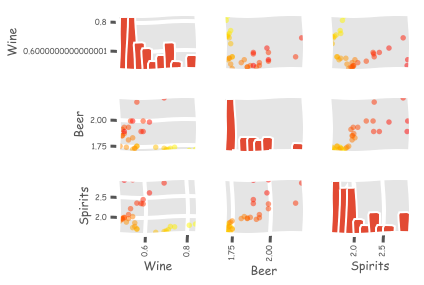

In [154]:
from pandas.plotting import scatter_matrix
import matplotlib, matplotlib.pyplot as plt
import pickle, pandas as pd

alco = pickle.load(open("alco.pickle", "rb"))

matplotlib.style.use("ggplot")

STATE = "New Hampshire"
statedata = alco.loc[STATE].reset_index()
scatter_matrix(statedata[["Wine", "Beer", "Spirits"]],
              s=120, c=statedata["Year"], cmap=plt.cm.autumn)

plt.tight_layout()

## Pie Chart of US States by First Letter

In [155]:
# new dataframe with states 
states = pd.read_csv("states.csv")

In [156]:
# create new column that contains the first letter of each state's name
states["first_letter"] = states["State"].apply(lambda state: state[0])

In [157]:
states.head()

,State,Standard,Postal,Capital,first_letter
0,Alabama,Ala.,AL,Montgomery,A
1,Alaska,Alaska,AK,Juneau,A
2,Arizona,Ariz.,AZ,Phoenix,A
3,Arkansas,Ark.,AR,Little Rock,A
4,California,Calif.,CA,Sacramento,C


In [158]:
# Group the records by the first_letter column and get a count for each letter
# Save this data into a new dataframe
grouped = pd.DataFrame(states["first_letter"]\
    .groupby(states["first_letter"])\
    .size().reset_index(name = "count"))

grouped

,first_letter,count
0,A,4
1,C,3
2,D,1
3,F,1
4,G,1
5,H,1
6,I,4
7,K,2
8,L,1
9,M,8


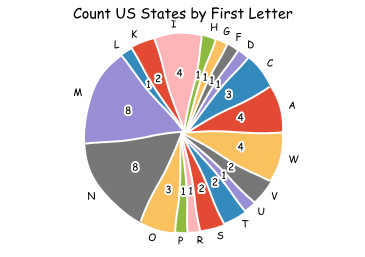

In [160]:
fig, ax = plt.subplots()

ax.pie(grouped["count"], 
       labels=grouped["first_letter"],
       # Convert the percentage into its value
       autopct=lambda x : '{:,.0f}'.format(x * sum(grouped["count"])/100))

ax.axis("equal")
ax.set_title("Count US States by First Letter")

plt.show()